#**Import the Necessary Libraries**



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


#**Data Description and Statistics**

In [3]:
#load the dataset used for training
df_path='/content/drive/MyDrive/ML-AI projects/titanic survival prediction/dataset/train.csv'
df=pd.read_csv(df_path)
c=0
for ele in df['Sex']:
   if ele == 'male':
     c+=1
print(" males == ",c)
#inspect the loaded dataset and get basic statistics  and uniqueness of the  features
print(df.describe())
print("\n the number of unique values for each feature are:: \n",df.nunique())

#check for missing values
print("\n the missing values per feature are : \n",df.isnull().sum())

# check which features are numerical or not
categorical_features= df.select_dtypes(include=['object','category']).columns.tolist()
numerical_features= df.select_dtypes(include=['number']).columns.tolist()
print("\n the categorical features are : \n",categorical_features)
print("\n the numerical features are : \n",numerical_features)

 males ==  577
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  

 the number of unique values for each feature are:: 
 PassengerId

#**Mono-Variant Analysis**


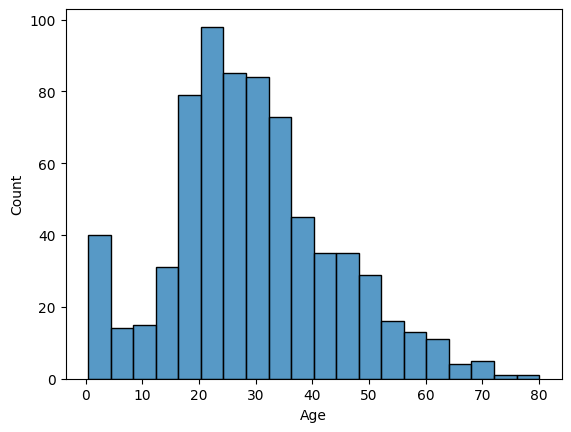

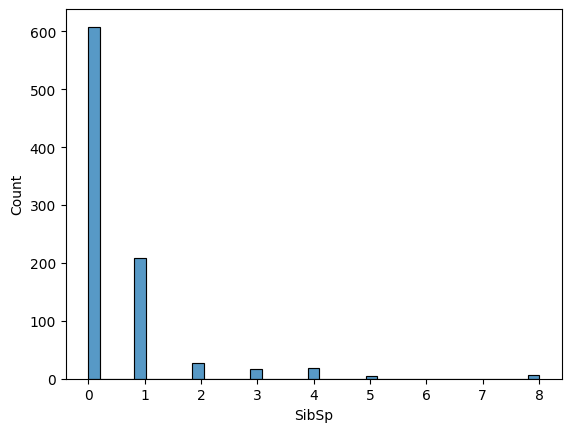

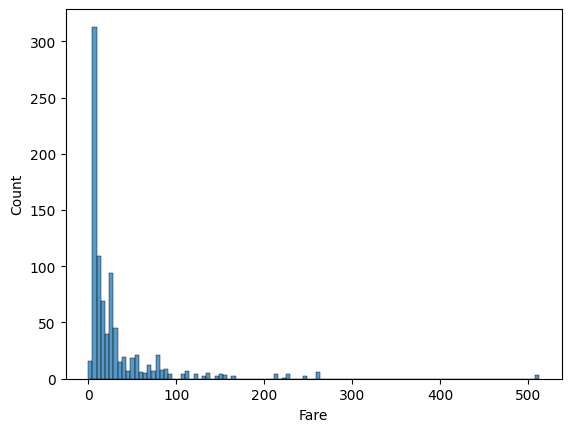

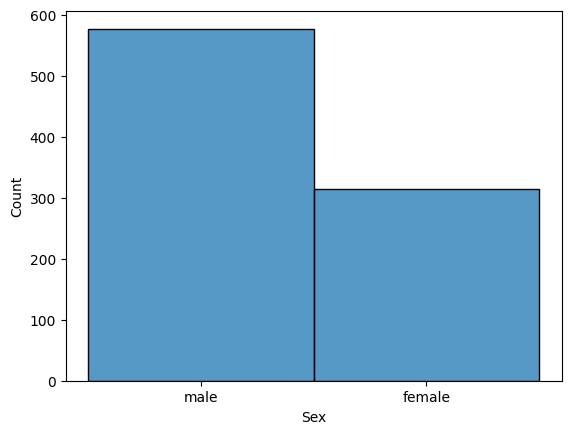

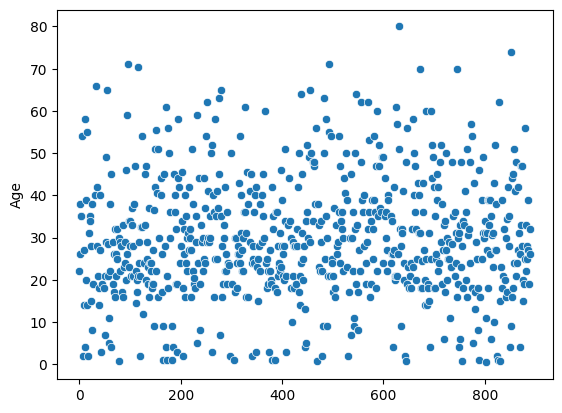

In [4]:
histogram_features=['Age','SibSp','Fare','Sex']
scatter_features=['Age']
bar_features=['Sex']


for feature in histogram_features:
  sns.histplot(df[feature])
  plt.show()

for feature in scatter_features:
  sns.scatterplot(df[feature])
  plt.show()



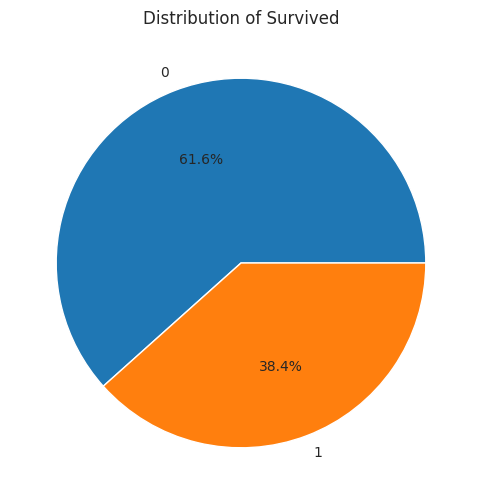

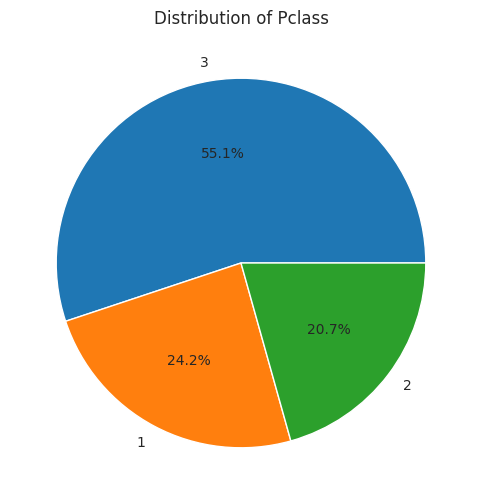

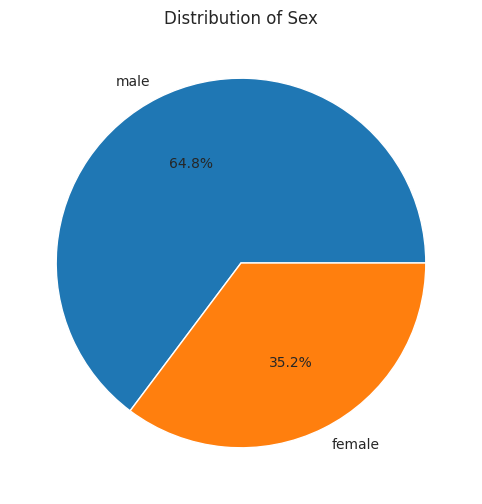

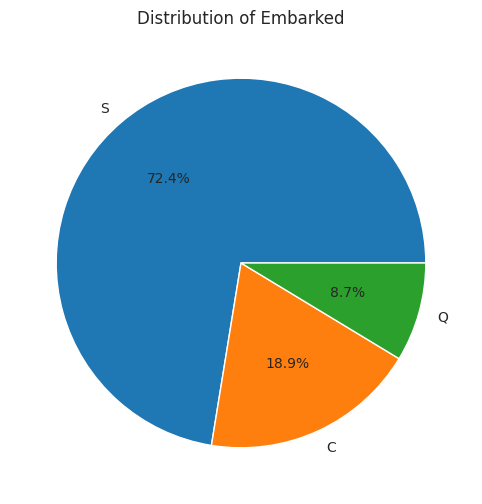

In [5]:
pie_chart_features=['Survived','Pclass','Sex','Embarked']
sns.set_style('whitegrid')
for feature in pie_chart_features :
  plt.figure(figsize=(8,6))
  plt.pie(df[feature].value_counts(),labels=df[feature].value_counts().index,autopct='%1.1f%%')
  plt.title(f'Distribution of {feature}')
  plt.show()

#**Bi-variante Analysis**

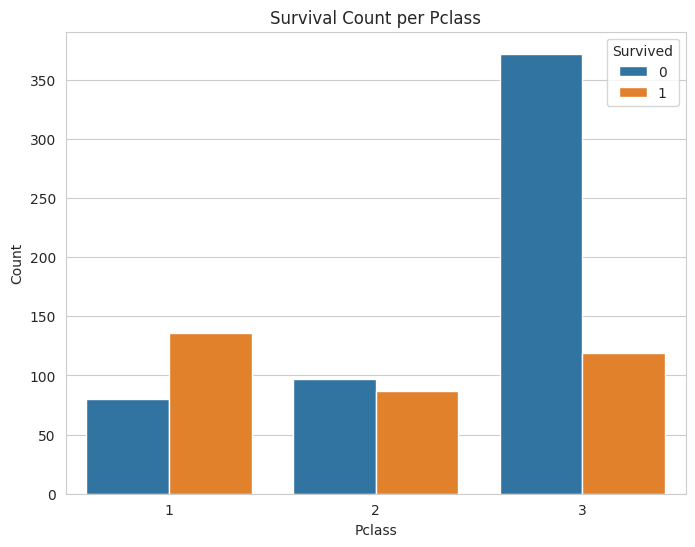

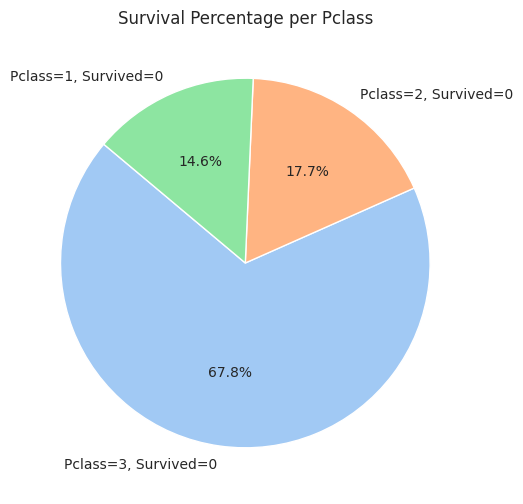

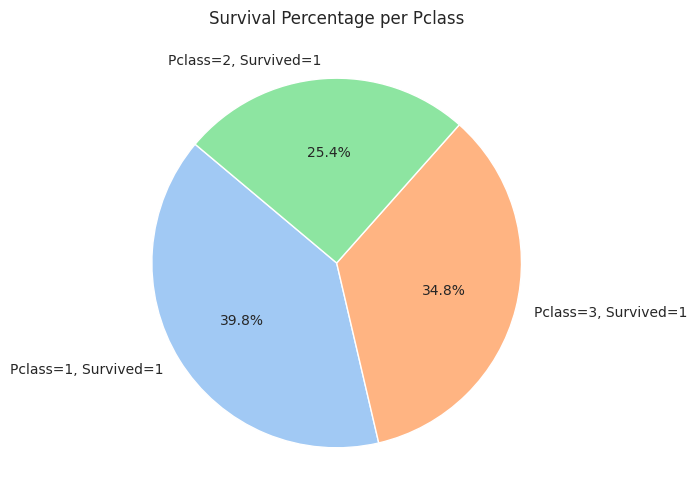

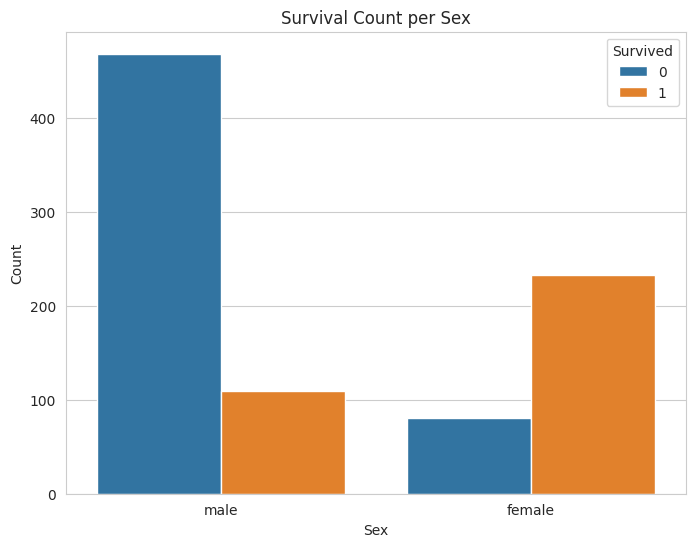

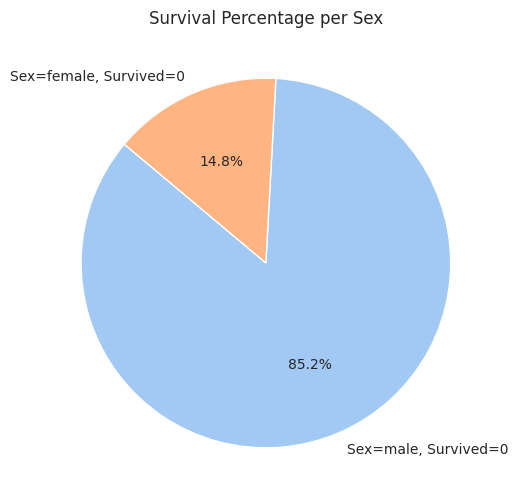

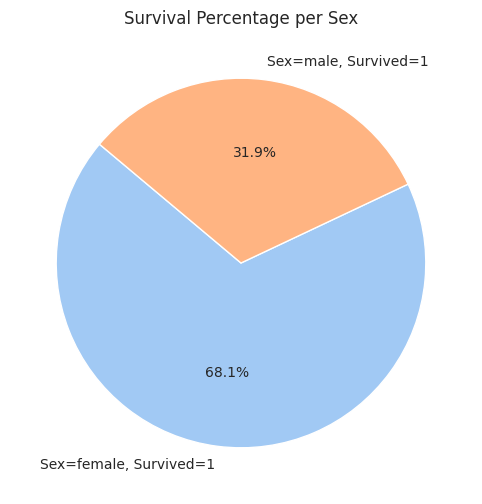

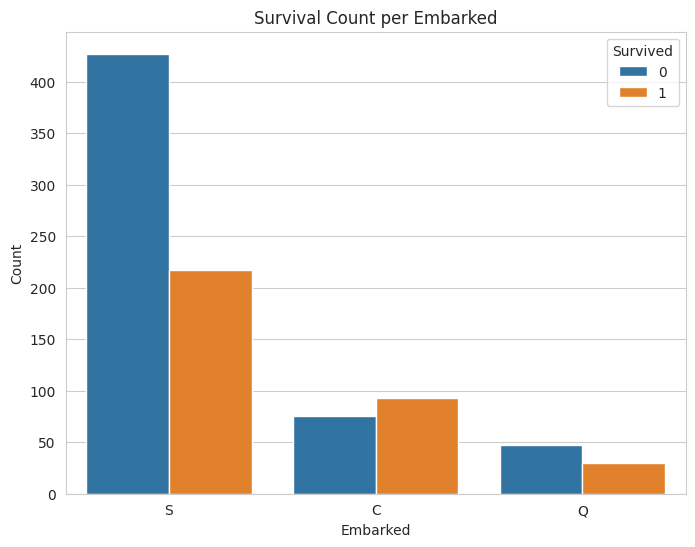

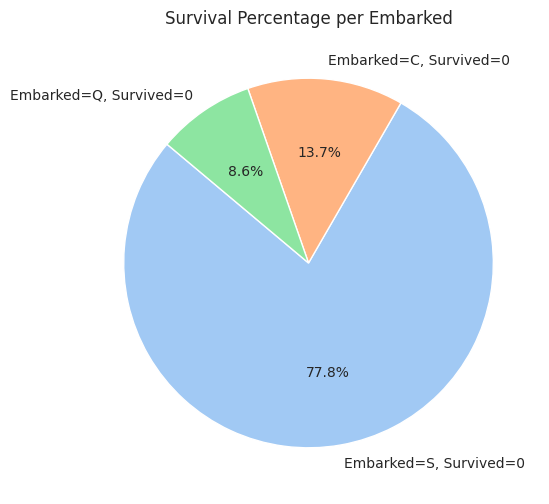

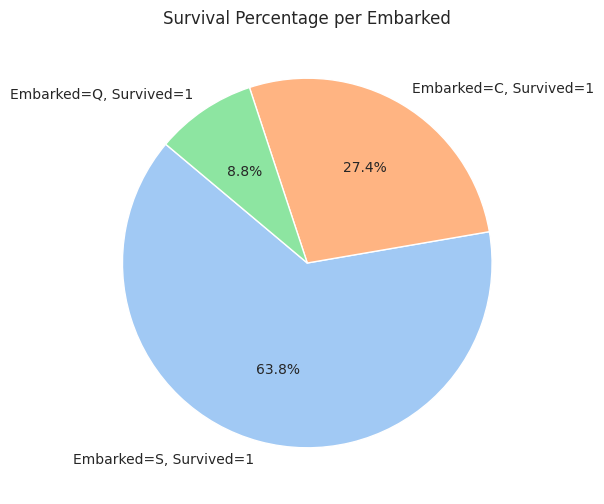

In [12]:
target = 'Survived'
count_plot_features = ['Pclass', 'Sex', 'Embarked']
for feature in count_plot_features:
    if feature != target:
        plt.figure(figsize=(8,6))

        # Create a count plot of survival counts per class of the feature
        sns.countplot(x=feature, hue=target, data=df)
        print("\n")
        print("\n")
        plt.title(f'Survival Count per {feature}')
        plt.ylabel('Count')
        plt.xlabel(feature)
        plt.show()

        target_classes= df[target].unique()
        for t_class in target_classes:

          df_filtered= df[df[target]==t_class]
          class_counts= df_filtered[feature].value_counts()

          plt.figure(figsize=(8,6))
          labels = [f"{feature}={idx}, {target}={t_class}" for idx in class_counts.index ]
          values = class_counts.values

          plt.pie(values, labels=labels, autopct='%1.1f%%', colors=sns.color_palette("pastel"),startangle=140)
          print("\n")
          print("\n")
          plt.title(f'Survival Percentage per {feature}')
          plt.show()





#**Heatmap of numerical features**


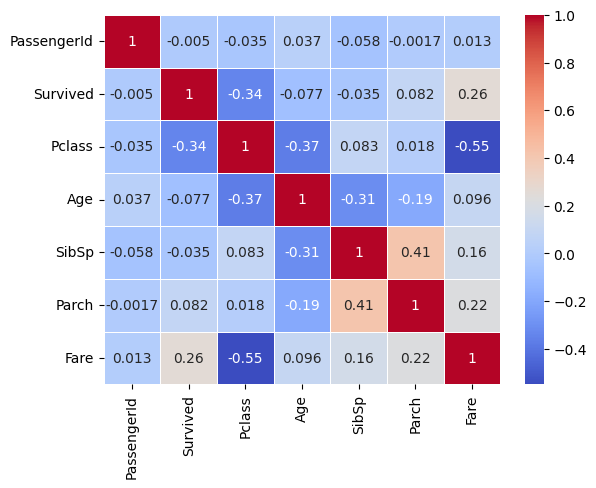

In [ ]:
correlation_matrix= df.corr(numeric_only=True) # only numerical features
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm', linewidth=0.5)
plt.show()